<a href="https://colab.research.google.com/github/JoysgitHub/AI-COLLAB/blob/main/CNN_TIMED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/1000
3/3 [==============================] - 1s 101ms/step - loss: 1.1725 - accuracy: 0.3125 - val_loss: 1.0774 - val_accuracy: 0.2917
Epoch 2/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.0660 - accuracy: 0.4271 - val_loss: 1.0013 - val_accuracy: 0.2917
Epoch 3/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.0016 - accuracy: 0.6354 - val_loss: 0.9290 - val_accuracy: 0.9167
Epoch 4/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.9326 - accuracy: 0.7083 - val_loss: 0.8564 - val_accuracy: 0.9167
Epoch 5/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.8542 - accuracy: 0.8229 - val_loss: 0.7917 - val_accuracy: 0.9167
Epoch 6/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.7943 - accuracy: 0.7917 - val_loss: 0.7334 - val_accuracy: 0.9167
Epoch 7/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.7452 - accuracy: 0.8750 - val_loss: 0.6782 - val_accuracy: 0.9167
Epoch 8/1000

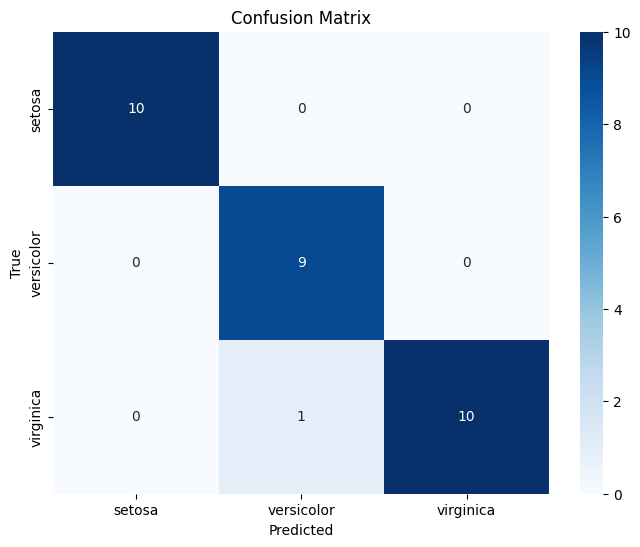

Execution time: 3.46 seconds


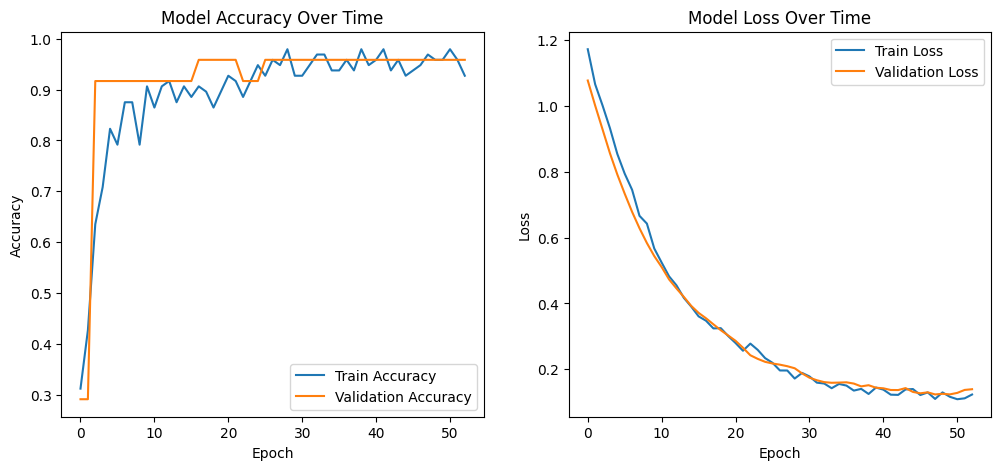

In [3]:
import numpy as np  # Import numpy library for numerical operations
from sklearn.datasets import load_iris  # Import Iris dataset
from sklearn.model_selection import train_test_split  # Split dataset into train and test sets
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix  # Evaluation metrics
from tensorflow.keras.utils import to_categorical  # One-hot encode target labels
from tensorflow.keras.models import Sequential  # Sequential model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout  # Layers for CNN
from tensorflow.keras.callbacks import EarlyStopping  # Callback for early stopping
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Visualization library
import time  # Measure execution time

# Record the start time
start_time = time.time()

# Load the Iris dataset
iris = load_iris()
x = iris.data  # Features
y = iris.target  # Target labels

# One-hot encode the target labels
y = to_categorical(y)

# Split the data into training and testing sets
# with 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize the input data
x_train = (x_train - np.mean(x_train)) / np.std(x_train)  # Normalize training data
x_test = (x_test - np.mean(x_test)) / np.std(x_test)  # Normalize testing data

# Reshape input data for Conv1D
# Add an additional dimension to represent the number of channels (in this case, 1 channel)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)  # Reshape training data
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)  # Reshape testing data

# Build the CNN model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))  # Add 1D convolutional layer with 64 filters and kernel size 3
model.add(MaxPooling1D(pool_size=2))  # Add 1D max pooling layer with pool size 2
model.add(Flatten())  # Flatten the output to be fed into fully connected layers
model.add(Dense(256, activation='relu'))  # Add fully connected layer with 256 neurons and ReLU activation
model.add(Dropout(0.5))  # Added dropout for regularization
model.add(Dense(y_train.shape[1], activation='softmax'))  # Add output layer with softmax activation for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Monitor validation loss and stop training if it doesn't improve for 5 epochs

# Train the model with validation split for early stopping
#history = model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# x_train, y_train: These are the training data and labels.
# epochs=s2000: The model will go through the training data 2000 time.
# batch_size=32: Each batch that is passed through the network will contain 32 samples.
# validation_split=0.2: 20% of the training data will be set aside as a validation dataset to evaluate the model after each epoch.
# callbacks=[early_stopping]: This is a list of callbacks to apply during training.
# In this case, early_stopping will stop the training process before reaching 2000 epochs if the model’s performance on the validation
# set doesn’t improve for a defined number of epochs (patience parameter in the EarlyStopping callback).

# End timing
end_time = time.time()  # Record the end time of model evaluation
execution_time = end_time - start_time  # Calculate the total execution time

# Evaluate the model
y_pred = model.predict(x_test)  # Predict class labels for the test set
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)  # Calculate accuracy
f1 = f1_score(np.argmax(y_test, axis=1), y_pred_classes, average='weighted')  # Calculate F1 score
recall = recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='weighted')  # Calculate recall

# Print evaluation metrics
# Print the accuracy, F1 score, and recall of the model, rounded to two decimal places
print(f"Accuracy: {accuracy*100:.2f} %")
print(f"F1 Score: {f1*100:.2f} %")
print(f"Recall: {recall*100:.2f} %")

# Calculate and display confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)  # Generate confusion matrix
print("Confusion Matrix:")  # Print header for confusion matrix
plt.figure(figsize=(8, 6))  # Set figure size for heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)  # Plot confusion matrix as heatmap
plt.xlabel('Predicted')  # Label x-axis
plt.ylabel('True')  # Label y-axis
plt.title('Confusion Matrix')  # Set title for the plot
plt.show()  # Display the confusion matrix plot

print(f"Execution time: {execution_time:.2f} seconds")  # Print total execution time

# Plot accuracy and loss over time
plt.figure(figsize=(12, 5))

# Create subplots for accuracy and loss visualization
plt.subplot(1, 2, 1)  # Create subplot with 1 row, 2 columns, and index 1 (left subplot)
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Plot training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy over epochs
plt.title('Model Accuracy Over Time')  # Set title for accuracy subplot
plt.xlabel('Epoch')  # Set x-axis label
plt.ylabel('Accuracy')  # Set y-axis label
plt.legend()  # Add legend to the plot

plt.subplot(1, 2, 2)  # Create subplot with 1 row, 2 columns, and index 2 (right subplot)
plt.plot(history.history['loss'], label='Train Loss')  # Plot training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss over epochs
plt.title('Model Loss Over Time')  # Set title for loss subplot
plt.xlabel('Epoch')  # Set x-axis label
plt.ylabel('Loss')  # Set y-axis label
plt.legend()  # Add legend to the plot

plt.show()  # Display the subplots